In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline


In [78]:
appleapp=pd.read_csv('AppleStore.csv')

##### Checking Null Values

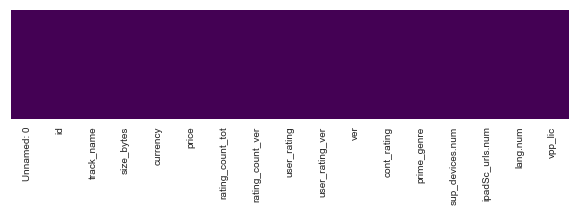

In [79]:
plt.figure(figsize=(10,2))
sns.heatmap(appleapp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [80]:
appleapp.nunique()

Unnamed: 0          7197
id                  7197
track_name          7195
size_bytes          7107
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1590
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64

In [81]:
appleapp.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [82]:
appleapp.drop('Unnamed: 0', inplace=True, axis=1)
appleapp.set_index('id', inplace=True)

##### Created a Column 'size_mb' to convert Bytes into MB and then rounded-off the results

In [83]:
appleapp['size_mb']=appleapp['size_bytes'].apply(lambda x:x/1000000).apply(lambda y: round(y,2)).astype(int)

## Created a Column 'developer_score' to convert 'Mobile App Version' into a discrete integer.
## Fetching the first character from 'Mobile App Version' column 


In [84]:
appleapp['developer_score']=appleapp['ver'].apply(lambda x:x[:1])
appleapp['developer_score'].unique()

array(['6', '8', '5', '7', '1', '3', '4', '2', '9', '0', 'i', 'v', 'V',
       'U'], dtype=object)

In [85]:
subsetdf = appleapp[appleapp['developer_score'].isin(['i', 'v', 'V', 'U']) ]
subsetdf

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,developer_score
id,,,,,,,,,,,,,,,,,
334264405,iOvilus,9946112,USD,1.99,381,6,3.0,2.0,iOV 2.1.3,12+,Entertainment,38,0,1,1,9,i
491730359,The CW,30552064,USD,0.00,97368,9,4.5,3.5,v2.13.9,12+,Entertainment,37,5,9,1,30,v
931337752,幻獣契約クリプトラクト,97223680,USD,0.00,33,0,4.0,0.0,v3.6.9,9+,Games,40,5,1,1,97,v
945621521,Quick Hit Slots – Casino Slot Machines Games,186679296,USD,0.00,7646,46,4.0,4.0,v2.2.21,17+,Games,38,5,1,1,186,v
983202217,乐视体育—英超欧冠F1高清直播,121336832,USD,0.00,24,0,3.5,0.0,V3.7.0,17+,Sports,38,0,4,1,121,V
1023683909,Alliance Wars: World Domination,493512704,USD,0.00,176,6,5.0,5.0,v1.865,12+,Games,38,1,1,1,493,v
1028464453,Strawberry Shortcake Candy Garden,232399872,USD,0.00,633,633,4.5,4.5,Update 1.1,4+,Entertainment,39,5,10,1,232,U


### Dropping the columns where 'Mobile version' had anomalies on indexing

In [86]:
subsetdf_index = appleapp[appleapp['developer_score'].isin(['i', 'v', 'V', 'U']) ].index
appleapp.drop(subsetdf_index, inplace=True)

In [87]:
appleapp['developer_score'].dtype

dtype('O')

In [88]:
appleapp['developer_score'].astype(int)

id
281656475     6
281796108     8
281940292     5
282614216     5
282935706     7
283619399     1
283646709     6
284035177     8
284666222     3
284736660     4
284791396     4
284815117     5
284815942     2
284847138     7
284862767     4
284876795     2
284882215     9
284910350     1
284993459     1
285005463     1
285946052     3
285994151     5
286058814     6
286070473     9
286799607     2
286906691     8
286911400     2
288113403     1
288120394     1
288419283     3
             ..
1182265441    1
1182331762    1
1182568288    1
1183234072    1
1183260922    1
1183548754    1
1183709176    1
1183856228    1
1183986102    1
1184711626    1
1184800011    1
1185209084    1
1185328193    0
1185365336    1
1185428381    1
1185538497    1
1185580782    2
1185731859    1
1185777521    1
1186108496    1
1186126548    1
1186384912    1
1187128255    2
1187279979    1
1187282363    1
1187617475    1
1187682390    0
1187779532    1
1187838770    1
1188375727    1
Name: developer_score

In [89]:
appleapp['developer_score'].dtype

dtype('O')

In [90]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

#### COnverting Categorical String value to more identifiable object

In [91]:
appleapp['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [92]:
def userapproriate(x):
    if x =='4+':
        return 'Toddler rated'
    if x =='9+':
        return 'Kids rated'
    if x =='12+':
        return 'Teenagers rated'
    else:
        return 'Adult rated'

appleapp['age_approriate']=appleapp['cont_rating'].apply(lambda x:userapproriate(x))

##### Most Rated App (Highest Total Rating Count)

In [93]:
appleapp[appleapp['rating_count_tot']==appleapp['rating_count_tot'].max()][['track_name',
                                                                            'developer_score','size_mb',
                                                                            'age_approriate']]

,track_name,developer_score,size_mb,age_approriate
id,,,,
284882215,Facebook,9,389,Toddler rated



## *** Top 5 App with Avg. User Rating Count ***
#### Earlier, Facebook was the most rated app since it's number of users were maximum. 
#### But if we see Average Rating per user, the story is different:

In [94]:
appleapp[appleapp['user_rating']==appleapp['user_rating'].max()][['track_name',
                                                                  'developer_score','size_mb','age_approriate',
                                                                  'price']].head(5)

,track_name,developer_score,size_mb,age_approriate,price
id,,,,,
285994151,:) Sudoku +,5,6,Toddler rated,2.99
335545504,King of Dragon Pass,2,364,Teenagers rated,9.99
342548956,TurboScan™ Pro - document & receipt scanner: s...,2,8,Toddler rated,4.99
350642635,Plants vs. Zombies,1,105,Kids rated,0.99
353372460,Learn to Speak Spanish Fast With MosaLingua,9,48,Teenagers rated,4.99


##### Dropping Few Columns which we won't be using in EDA and ML Modeling

In [95]:
appleapp.drop(['size_bytes', 'currency', 'rating_count_tot', 'rating_count_ver', 
               'ver', 'cont_rating'], axis=1, inplace=True)

In [96]:
appleapp.columns

Index(['track_name', 'price', 'user_rating', 'user_rating_ver', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'size_mb',
       'developer_score', 'age_approriate'],
      dtype='object')

In [97]:
appleapp.head()

,track_name,price,user_rating,user_rating_ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,developer_score,age_approriate
id,,,,,,,,,,,,
281656475,PAC-MAN Premium,3.99,4.0,4.5,Games,38,5,10,1,100,6,Toddler rated
281796108,Evernote - stay organized,0.00,4.0,3.5,Productivity,37,5,23,1,158,8,Toddler rated
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,3.5,4.5,Weather,37,5,3,1,100,5,Toddler rated
282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,4.0,4.5,Shopping,37,5,9,1,128,5,Teenagers rated
282935706,Bible,0.00,4.5,5.0,Reference,37,5,45,1,92,7,Toddler rated


In [98]:
appleapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7190 entries, 281656475 to 1188375727
Data columns (total 12 columns):
track_name         7190 non-null object
price              7190 non-null float64
user_rating        7190 non-null float64
user_rating_ver    7190 non-null float64
prime_genre        7190 non-null object
sup_devices.num    7190 non-null int64
ipadSc_urls.num    7190 non-null int64
lang.num           7190 non-null int64
vpp_lic            7190 non-null int64
size_mb            7190 non-null int64
developer_score    7190 non-null object
age_approriate     7190 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 730.2+ KB


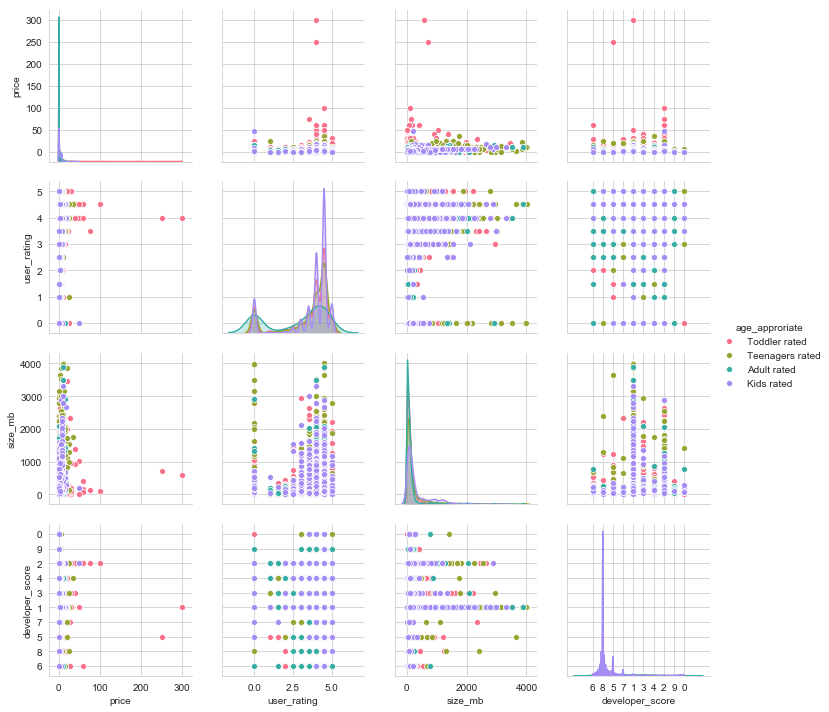

In [99]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(appleapp, vars=['price','user_rating','size_mb',
                             'developer_score'], kind='scatter', 
             palette='husl', hue='age_approriate', plot_kws={'alpha':1})

## Checking co-relations

Text(0.5, 1.0, 'Apple App Store Parameters Correlation')

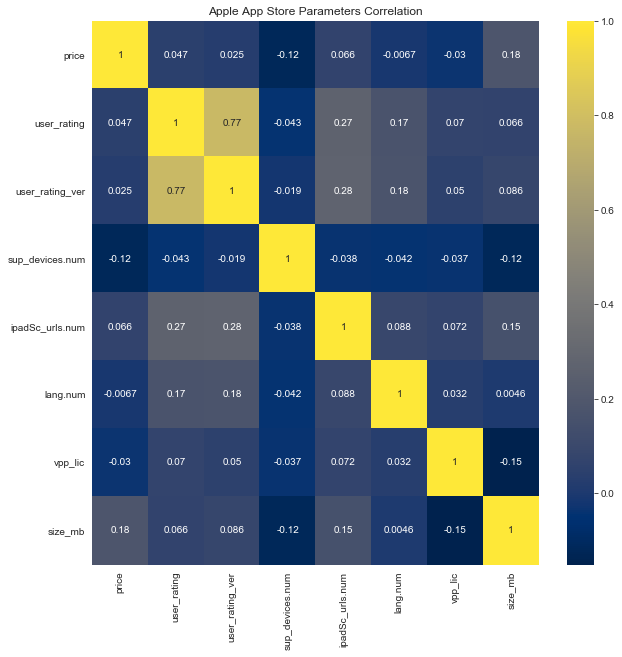

In [23]:
sns.heatmap(appleapp.corr(),cmap='cividis', annot=True)
plt.title('Apple App Store Parameters Correlation')

In [24]:
appleapp.columns

Index(['track_name', 'price', 'user_rating', 'user_rating_ver', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'size_mb',
       'developer_score', 'age_approriate'],
      dtype='object')

## Avg. rating lies between 4 to 5 stars

Text(0.5, 0, 'user_rating')

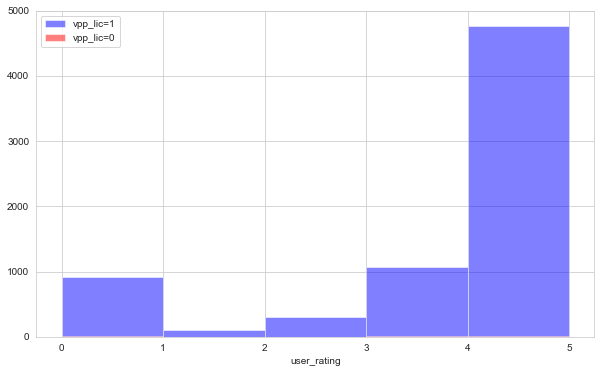

In [25]:
plt.figure(figsize=(10,6))
appleapp[appleapp['vpp_lic']==1]['user_rating'].hist(alpha=0.5,color='blue',
                                              bins=5,label='vpp_lic=1')
appleapp[appleapp['vpp_lic']==0]['user_rating'].hist(alpha=0.5,color='red',
                                              bins=5,label='vpp_lic=0')
plt.legend()
plt.xlabel('user_rating')

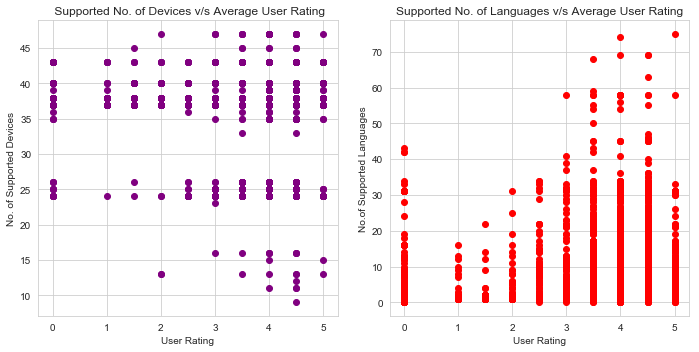

In [26]:
fig, axes =plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].scatter(appleapp['user_rating'], appleapp['sup_devices.num'],  color='purple')
axes[1].scatter(appleapp['user_rating'],appleapp['lang.num'], color='red')

axes[0].set_title(' Supported No. of Devices v/s Average User Rating')
axes[0].set_xlabel('User Rating')
axes[0].set_ylabel('No. of Supported Devices')

axes[1].set_title('Supported No. of Languages v/s Average User Rating')
axes[1].set_xlabel('User Rating')
axes[1].set_ylabel('No.of Supported Languages')
plt.tight_layout()

#### A jointplot between number of screenshots attached to the description and User_rating uncovers that the 
#### most rated apps have atleast 5 screenshots attached

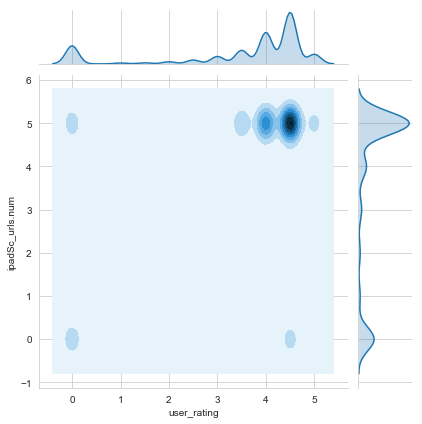

In [27]:
sns.jointplot(x='user_rating',y='ipadSc_urls.num', data=appleapp, kind='kde')

Text(0.5, 0.98, 'price v/s user ratings')

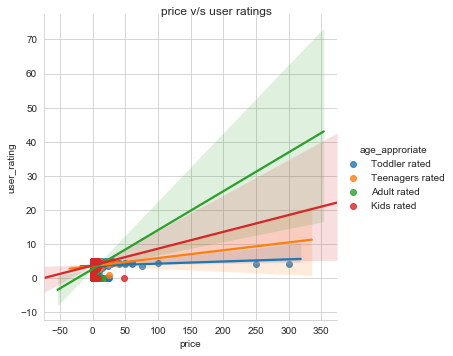

In [28]:
lm1=sns.lmplot(x='price',y='user_rating',data=appleapp,hue='age_approriate')
fig1=lm1.fig
fig1.suptitle('price v/s user ratings')

Text(0.5, 0.98, 'Size of App v/s user ratings')

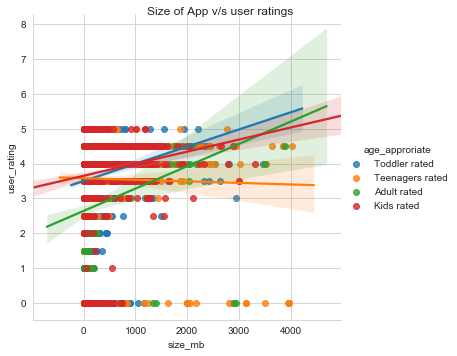

In [29]:
lm2=sns.lmplot(x='size_mb',y='user_rating',data=appleapp, hue='age_approriate')
fig2=lm2.fig
fig2.suptitle('Size of App v/s user ratings')

# Predictive ML Models


## 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [103]:
le_dict = {}
for col in appleapp.dtypes[appleapp.dtypes=="object"].index:
    print(col)
    le_dict[col] = preprocessing.LabelEncoder()
    appleapp[col] = le_dict[col].fit_transform(appleapp[col].astype(str))

track_name
prime_genre
developer_score
age_approriate


In [104]:
appleapp.head()

,track_name,price,user_rating,user_rating_ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,developer_score,age_approriate
id,,,,,,,,,,,,
281656475,3675,3.99,4.0,4.5,7,38,5,10,1,100,6,3
281796108,1663,0.00,4.0,3.5,15,37,5,23,1,158,8,3
281940292,5866,0.00,3.5,4.5,22,37,5,3,1,100,5,3
282614216,6128,0.00,4.0,4.5,17,37,5,9,1,128,5,2
282935706,526,0.00,4.5,5.0,16,37,5,45,1,92,7,3


In [105]:
appleapp.columns

Index(['track_name', 'price', 'user_rating', 'user_rating_ver', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'size_mb',
       'developer_score', 'age_approriate'],
      dtype='object')

In [106]:
X=appleapp[['track_name', 'price', 'user_rating_ver',
       'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num',
       'vpp_lic', 'size_mb', 'developer_score', 'age_approriate']].astype(int)

y=appleapp['user_rating'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [107]:
lm=LogisticRegression()
lm.fit(X_train, y_train)
predictions=lm.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [108]:
print('Classification Report \n', classification_report(y_test, predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.97      0.79       269
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        85
           3       0.23      0.03      0.05       319
           4       0.71      0.94      0.81      1294
           5       0.00      0.00      0.00       153

   micro avg       0.69      0.69      0.69      2157
   macro avg       0.27      0.32      0.27      2157
weighted avg       0.54      0.69      0.59      2157



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 2. K Nearest Neighbor

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(appleapp.drop('user_rating', axis=1))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
scaled_features = scaler.transform(appleapp.drop('user_rating', axis=1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [111]:
appleapp.columns

Index(['track_name', 'price', 'user_rating', 'user_rating_ver', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'size_mb',
       'developer_score', 'age_approriate'],
      dtype='object')

In [112]:
scaled_df = pd.DataFrame(scaled_features)
scaled_df.columns = ['track_name', 'price', 'user_rating_ver',
       'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num',
       'vpp_lic', 'size_mb', 'developer_score', 'age_approriate']
scaled_df.head()

,track_name,price,user_rating_ver,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb,developer_score,age_approriate
0,0.039173,0.387711,0.688705,-0.325184,0.170920,0.650864,0.576069,0.083683,-0.274606,2.348224,0.691687
1,-0.930530,-0.296068,0.135927,1.319174,-0.096526,0.650864,2.217091,0.083683,-0.113191,3.530890,0.691687
2,1.095146,-0.296068,0.688705,2.757987,-0.096526,0.650864,-0.307558,0.083683,-0.274606,1.756892,0.691687
3,1.221419,-0.296068,0.688705,1.730263,-0.096526,0.650864,0.449837,0.083683,-0.196682,1.756892,-0.306152
4,-1.478517,-0.296068,0.965094,1.524718,-0.096526,0.650864,4.994205,0.083683,-0.296870,2.939557,0.691687


In [113]:
X=scaled_features
y=appleapp['user_rating'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [115]:
predictions=knn.predict(X_test)

In [116]:
print('\n Confusion Matrix: \n', confusion_matrix(y_test, predictions))
print('\n Classification Report: \n', classification_report(y_test, predictions))


 Confusion Matrix: 
 [[ 241    1    3    8   14    2]
 [  15    5    8    5    4    0]
 [  14    8   15   25   22    1]
 [  30    6   26   66  190    1]
 [  51    7   26   82 1100   28]
 [   8    1    4    9  110   21]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.90      0.77       269
           1       0.18      0.14      0.15        37
           2       0.18      0.18      0.18        85
           3       0.34      0.21      0.26       319
           4       0.76      0.85      0.80      1294
           5       0.40      0.14      0.20       153

   micro avg       0.67      0.67      0.67      2157
   macro avg       0.42      0.40      0.39      2157
weighted avg       0.63      0.67      0.64      2157



### Finding best K value for the KNN Model

In [117]:
error_rate=[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

Text(0, 0.5, 'Error Rate')

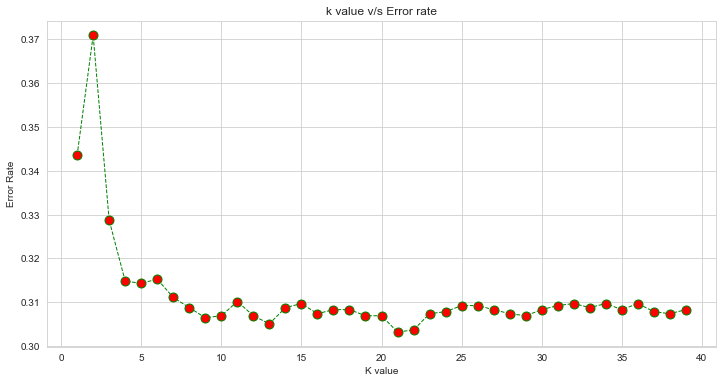

In [118]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='green', marker='o', linestyle='dashed', linewidth=1, 
         markerfacecolor='red', markersize=9)
plt.title('k value v/s Error rate')
plt.xlabel('K value')
plt.ylabel('Error Rate')

### Picking N=10, since the error_rate is minimum at that point.

In [119]:
knn_newk=KNeighborsClassifier(n_neighbors=13)
knn_newk.fit(X_train, y_train)
predictions_newk=knn_newk.predict(X_test)


In [120]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix: \n', confusion_matrix(y_test, predictions_newk))
print('\n\n Classification Report: \n', classification_report(y_test, predictions_newk))

Confusion matrix: 
 [[ 251    0    2    3   12    1]
 [  17    0    6   10    4    0]
 [  18    0    7   28   32    0]
 [  34    0    3   45  236    1]
 [  56    0    3   37 1194    4]
 [   9    0    0    3  139    2]]


 Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.93      0.77       269
           1       0.00      0.00      0.00        37
           2       0.33      0.08      0.13        85
           3       0.36      0.14      0.20       319
           4       0.74      0.92      0.82      1294
           5       0.25      0.01      0.02       153

   micro avg       0.69      0.69      0.69      2157
   macro avg       0.39      0.35      0.32      2157
weighted avg       0.61      0.69      0.62      2157



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 3. Random Forest & Decision Trees

In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
dtreec=DecisionTreeClassifier()
dtreec.fit(X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
prediction_dtc=dtreec.predict(X_test)

In [124]:
print('Confusion matrix: \n', confusion_matrix(y_test, prediction_dtc))
print('\n\n Classification Report: \n', classification_report(y_test, prediction_dtc))

Confusion matrix: 
 [[210   3   8   7  31  10]
 [  1  11  12   5   6   2]
 [  7   6  21  33  17   1]
 [ 13   4  23 127 142  10]
 [ 37   4  24 167 986  76]
 [  6   1   1  13  90  42]]


 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       269
           1       0.38      0.30      0.33        37
           2       0.24      0.25      0.24        85
           3       0.36      0.40      0.38       319
           4       0.78      0.76      0.77      1294
           5       0.30      0.27      0.29       153

   micro avg       0.65      0.65      0.65      2157
   macro avg       0.47      0.46      0.46      2157
weighted avg       0.65      0.65      0.65      2157



In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfc=RandomForestClassifier()

In [127]:
rfc.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
prediction_rfc=rfc.predict(X_test)

In [129]:
print('Confusion matrix: \n', confusion_matrix(y_test, prediction_rfc))
print('\n\n Classification Report: \n', classification_report(y_test, prediction_rfc))

Confusion matrix: 
 [[ 245    1    1    5   17    0]
 [   4    9   12    7    5    0]
 [   7    5   21   32   20    0]
 [  16    3   22  121  154    3]
 [  42    2   12   97 1120   21]
 [   6    1    0    6  104   36]]


 Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       269
           1       0.43      0.24      0.31        37
           2       0.31      0.25      0.27        85
           3       0.45      0.38      0.41       319
           4       0.79      0.87      0.83      1294
           5       0.60      0.24      0.34       153

   micro avg       0.72      0.72      0.72      2157
   macro avg       0.56      0.48      0.50      2157
weighted avg       0.70      0.72      0.70      2157



## 4. Support Vector Machines

In [130]:
from sklearn.svm import SVC

In [131]:
svcm=SVC()

In [132]:
svcm.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [133]:
predictions_svc=svcm.predict(X_test)

In [134]:
print('Clasification report: \n', classification_report(y_test, predictions_svc))
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions_svc))

Clasification report: 
               precision    recall  f1-score   support

           0       0.70      0.96      0.81       269
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        85
           3       0.27      0.06      0.10       319
           4       0.72      0.95      0.82      1294
           5       0.00      0.00      0.00       153

   micro avg       0.70      0.70      0.70      2157
   macro avg       0.28      0.33      0.29      2157
weighted avg       0.56      0.70      0.61      2157

Confusion Matrix: 
 [[ 257    0    0    0   12    0]
 [   7    0    1   18   11    0]
 [  12    0    0   25   48    0]
 [  27    0    0   20  272    0]
 [  54    0    0   10 1230    0]
 [   9    0    1    0  143    0]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Finding the best parameters (C and gamma values) using Grid Search

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
param_grids={'C':[0.1, 1, 10, 100 ], 'gamma':[0.01, 0.001, 0.0001]}

In [137]:
grid=GridSearchCV(SVC(), param_grids, refit=True, verbose=2)

In [138]:
grid.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.5s
[CV] C=0.1, gamma=0.01 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ................................ C=0.1, gamma=0.01, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.5s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.3s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .............................. C=0.1, gamma=0.0001, total=   0.3s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .............................. C=0.1, gamma=0.0001, total=   0.3s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   24.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [67]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))

[[ 262    0    0    0    7    0]
 [   3    0    0   26    8    0]
 [  11    0    0   50   24    0]
 [  32    0    1   68  217    1]
 [  63    0    1   40 1189    1]
 [   8    0    0    2  143    0]]


In [68]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81       269
           1       0.00      0.00      0.00        37
           2       0.00      0.00      0.00        85
           3       0.37      0.21      0.27       319
           4       0.75      0.92      0.83      1294
           5       0.00      0.00      0.00       153

   micro avg       0.70      0.70      0.70      2157
   macro avg       0.30      0.35      0.32      2157
weighted avg       0.59      0.70      0.64      2157



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [70]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 **Achieved greater Efficiency using Gridsearch Parameters (C and gamma values)**

 ## Conclusion: 
 
 
 ### The Best Model to predict Ratings was Random Forest Classifier which predicted 70%(weighted_avg ) of the classes truly.
 ### And, using Support Vector Machines we were able to predict 70%(weighted_avg) of them correctly.